In [1]:
# Install dependencies if not installed
!pip install scikit-learn matplotlib seaborn wordcloud

Dataset Head:
                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


/tmp/ipython-input-2177756834.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


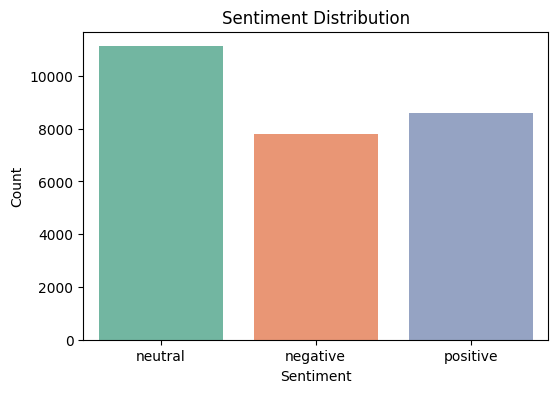

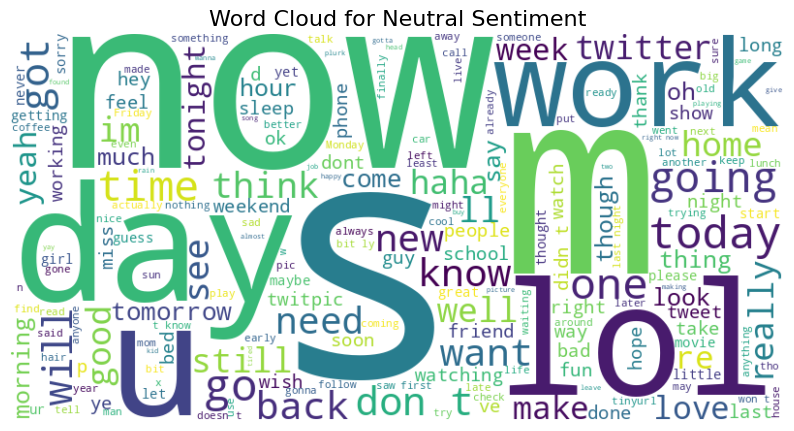

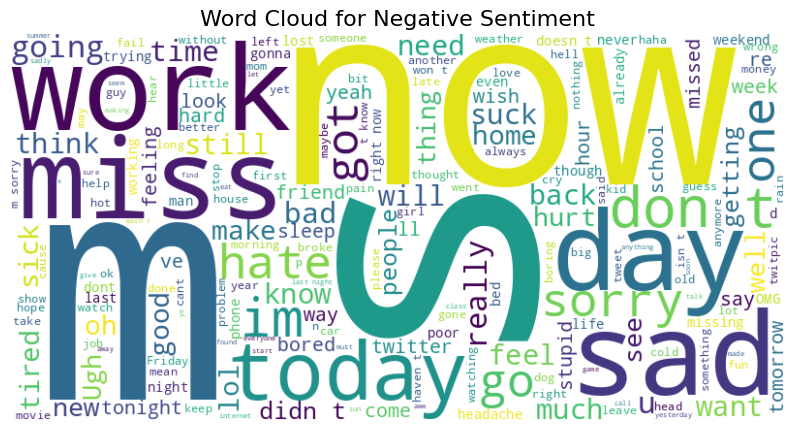

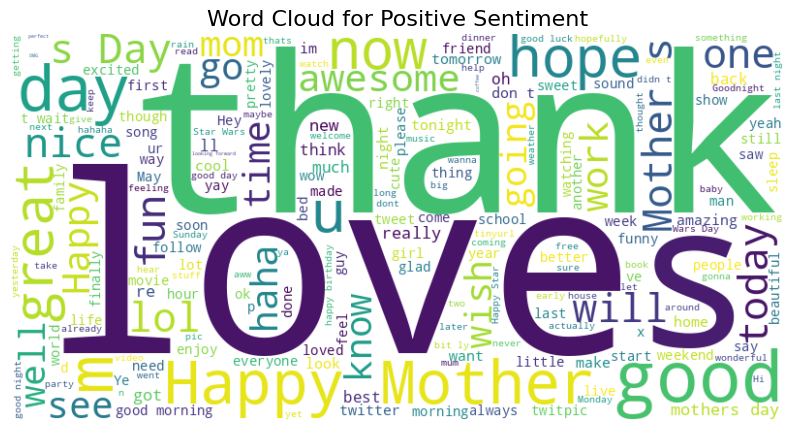


Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.49      0.59      1562
     neutral       0.56      0.75      0.64      2230
    positive       0.71      0.60      0.65      1705

    accuracy                           0.63      5497
   macro avg       0.67      0.62      0.63      5497
weighted avg       0.66      0.63      0.63      5497

Accuracy: 0.633072585046389


In [6]:
# ----------------------------------------
# Sentiment Analysis with Enhancements
# ----------------------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv("/content/train.csv", encoding="ISO-8859-1")

df = df[["text", "sentiment"]]

print("Dataset Head:")
print(df.head())



plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


def plot_wordcloud(sentiment):
    text = " ".join(review for review in df[df["sentiment"]==sentiment]["text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment", fontsize=16)
    plt.show()

for s in df["sentiment"].unique():
    plot_wordcloud(s)


X = df["text"].astype(str)   # ensure text type
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)


y_pred = model.predict(X_test_vec)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))



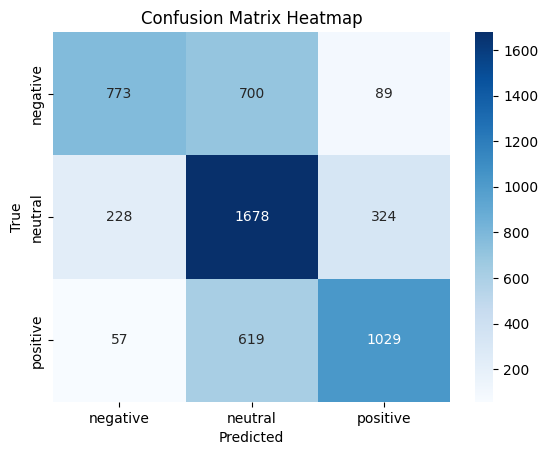


 Input Text: I love this product, it works great!
 Predicted Sentiment: positive (Confidence: 0.58)

 Input Text: This is the worst experience ever.
 Predicted Sentiment: negative (Confidence: 0.72)

 Input Text: It is okay, not too good, not too bad.
 Predicted Sentiment: positive (Confidence: 0.36)


In [8]:

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    proba = model.predict_proba(text_vec).max()
    print(f"\n Input Text: {text}")
    print(f" Predicted Sentiment: {prediction} (Confidence: {proba:.2f})")

# Example predictions
predict_sentiment("I love this product, it works great!")
predict_sentiment("This is the worst experience ever.")
predict_sentiment("It is okay, not too good, not too bad.")